In [1]:
import sys
print("Python Version:", sys.version)

Python Version: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [46]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import datetime
import warnings

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline

In [3]:
data_dictionary = """

Field Description

C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS


C/A      = Control Area (A002)
UNIT     = Remote Unit for a station (R051)
SCP      = Subunit Channel Position represents an specific address for a device (02-00-00)
STATION  = Represents the station name the device is located at
LINENAME = Represents all train lines that can be boarded at this station
           Normally lines are represented by one character.  LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains.
DIVISION = Represents the Line originally the station belonged to BMT, IRT, or IND   
DATE     = Represents the date (MM-DD-YY)
TIME     = Represents the time (hh:mm:ss) for a scheduled audit event
DESc     = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)
           1. Audits may occur more that 4 hours due to planning, or troubleshooting activities. 
           2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered. 
ENTRIES  = The comulative entry register value for a device
EXIST    = The cumulative exit register value for a device



Example:
The data below shows the entry/exit register values for one turnstile at control area (A002) from 09/27/14 at 00:00 hours to 09/29/14 at 00:00 hours

"""

In [4]:
def get_data(week_nums):
    url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

week_nums = [160507, 160514, 160521, 160528, 160604, 160611, 160618, 160625, 160702, 
            170506, 170513, 170520, 170527, 170603, 170610, 170617, 170624, 170701, 
            180505, 180512, 180519, 180526, 180602, 180609, 180616, 180623, 180630, 180707]
MTA = get_data(week_nums)
len(MTA)

5488335

In [5]:
MTA.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197


In [6]:
MTA.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [7]:
MTA.columns = [column.strip() for column in MTA.columns]
MTA.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [8]:
# Convert DATE to datetime format
MTA["DATE_TIME"] = pd.to_datetime(MTA.DATE, format="%m/%d/%Y")
MTA["DATE_TIME_CLOCK"] = pd.to_datetime(MTA.DATE + " " + MTA.TIME, format="%m/%d/%Y %H:%M:%S")
MTA.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE_TIME_CLOCK
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,2016-04-30,2016-04-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,2016-04-30,2016-04-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,2016-04-30,2016-04-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,2016-04-30,2016-04-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,2016-04-30,2016-04-30 16:00:00


In [9]:
# Create a Day of the Week column with datetime
MTA['Day_of_Week'] = MTA['DATE_TIME'].dt.day_name()
MTA.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE_TIME_CLOCK,Day_of_Week
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,2016-04-30,2016-04-30 00:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,2016-04-30,2016-04-30 04:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,2016-04-30,2016-04-30 08:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,2016-04-30,2016-04-30 12:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,2016-04-30,2016-04-30 16:00:00,Saturday


In [10]:
# Create Month and Year columns
MTA['MONTH'] = pd.DatetimeIndex(MTA['DATE_TIME']).month
MTA['YEAR'] = pd.DatetimeIndex(MTA['DATE_TIME']).year
MTA.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE_TIME_CLOCK,Day_of_Week,MONTH,YEAR
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,2016-04-30,2016-04-30 00:00:00,Saturday,4,2016
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,2016-04-30,2016-04-30 04:00:00,Saturday,4,2016
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,2016-04-30,2016-04-30 08:00:00,Saturday,4,2016
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,2016-04-30,2016-04-30 12:00:00,Saturday,4,2016
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,2016-04-30,2016-04-30 16:00:00,Saturday,4,2016


In [11]:
MTA.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE_TIME_CLOCK,Day_of_Week,MONTH,YEAR
197125,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,07/06/2018,17:00:00,REGULAR,2761,62,2018-07-06,2018-07-06 17:00:00,Friday,7,2018
197126,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,07/06/2018,21:00:00,REGULAR,2761,62,2018-07-06,2018-07-06 21:00:00,Friday,7,2018
197127,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/06/2018,13:00:00,REGULAR,5554,338,2018-07-06,2018-07-06 13:00:00,Friday,7,2018
197128,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/06/2018,17:00:00,REGULAR,5554,343,2018-07-06,2018-07-06 17:00:00,Friday,7,2018
197129,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/06/2018,21:00:00,REGULAR,5554,343,2018-07-06,2018-07-06 21:00:00,Friday,7,2018


In [12]:
# Parse out data from April and July
print(len(MTA))
MTA = MTA[MTA.MONTH != 4]
MTA = MTA[MTA.MONTH != 7]
print(len(MTA))
MTA.head()

5488335
5123279


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE_TIME_CLOCK,Day_of_Week,MONTH,YEAR
6,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,00:00:00,REGULAR,5640974,1910328,2016-05-01,2016-05-01 00:00:00,Sunday,5,2016
7,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,04:00:00,REGULAR,5640996,1910333,2016-05-01,2016-05-01 04:00:00,Sunday,5,2016
8,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,08:00:00,REGULAR,5641021,1910358,2016-05-01,2016-05-01 08:00:00,Sunday,5,2016
9,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,12:00:00,REGULAR,5641113,1910427,2016-05-01,2016-05-01 12:00:00,Sunday,5,2016
10,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,16:00:00,REGULAR,5641329,1910508,2016-05-01,2016-05-01 16:00:00,Sunday,5,2016


In [13]:
MTA.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE_TIME_CLOCK,Day_of_Week,MONTH,YEAR
197083,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/30/2018,05:00:00,REGULAR,2956605,387725,2018-06-30,2018-06-30 05:00:00,Saturday,6,2018
197084,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/30/2018,09:00:00,REGULAR,2956870,387729,2018-06-30,2018-06-30 09:00:00,Saturday,6,2018
197085,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/30/2018,13:00:00,REGULAR,2957671,387745,2018-06-30,2018-06-30 13:00:00,Saturday,6,2018
197086,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/30/2018,17:00:00,REGULAR,2958496,387751,2018-06-30,2018-06-30 17:00:00,Saturday,6,2018
197087,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/30/2018,21:00:00,REGULAR,2959289,387761,2018-06-30,2018-06-30 21:00:00,Saturday,6,2018


In [14]:
# Verify that entries for "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" are unique
MTA.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME_CLOCK"], as_index = False).ENTRIES.count().sort_values("ENTRIES", ascending=False).head()


,C/A,UNIT,SCP,STATION,DATE_TIME_CLOCK,ENTRIES
867559,H032,R295,00-05-00,WILSON AV,2016-05-31 16:00:00,2
867599,H032,R295,00-05-00,WILSON AV,2016-06-02 08:00:00,2
2358838,N418,R269,01-05-00,BEDFORD-NOSTRAN,2016-05-16 20:00:00,2
2358834,N418,R269,01-05-00,BEDFORD-NOSTRAN,2016-05-16 16:00:00,2
4585646,R511,R091,00-00-00,36 AV,2018-06-21 16:00:00,2


In [15]:
mask = ((MTA["C/A"] == "H032") & 
(MTA["UNIT"] == "R295") & 
(MTA["SCP"] == "00-05-00") & 
(MTA["STATION"] == "WILSON AV") &
(MTA["DATE_TIME_CLOCK"].dt.date == datetime.datetime(2018, 6, 15).date()))

MTA[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE_TIME_CLOCK,Day_of_Week,MONTH,YEAR
33736,H032,R295,00-05-00,WILSON AV,L,BMT,06/15/2018,00:00:00,REGULAR,122,0,2018-06-15,2018-06-15 00:00:00,Friday,6,2018
33737,H032,R295,00-05-00,WILSON AV,L,BMT,06/15/2018,04:00:00,REGULAR,122,0,2018-06-15,2018-06-15 04:00:00,Friday,6,2018
33738,H032,R295,00-05-00,WILSON AV,L,BMT,06/15/2018,08:00:00,REGULAR,122,0,2018-06-15,2018-06-15 08:00:00,Friday,6,2018
33739,H032,R295,00-05-00,WILSON AV,L,BMT,06/15/2018,12:00:00,REGULAR,122,0,2018-06-15,2018-06-15 12:00:00,Friday,6,2018
33740,H032,R295,00-05-00,WILSON AV,L,BMT,06/15/2018,16:00:00,REGULAR,122,0,2018-06-15,2018-06-15 16:00:00,Friday,6,2018


In [16]:
# Drop incorrect AUD entries
MTA.DESC.value_counts()
print(len(MTA))
MTA = MTA.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME_CLOCK"], ascending = False)
MTA = MTA.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME_CLOCK"])
print(len(MTA))

5123279
5123225


In [17]:
MTA.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME_CLOCK"], as_index = False).ENTRIES.count().sort_values("ENTRIES", ascending=False).head()


,C/A,UNIT,SCP,STATION,DATE_TIME_CLOCK,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-05-01 00:00:00,1
3415480,R147,R033,04-00-03,TIMES SQ-42 ST,2016-06-01 08:00:00,1
3415487,R147,R033,04-00-03,TIMES SQ-42 ST,2016-06-02 12:00:00,1
3415486,R147,R033,04-00-03,TIMES SQ-42 ST,2016-06-02 08:00:00,1
3415485,R147,R033,04-00-03,TIMES SQ-42 ST,2016-06-02 04:00:00,1


In [18]:
# Drop Exits and Desc columns
MTA = MTA.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [19]:
# Convert rows to represent a single day, rather than n hours, at each turnstile
print(len(MTA))
MTA_daily = MTA.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], as_index = False).ENTRIES.first()
print(len(MTA_daily))

5123225
851119


In [20]:
MTA_daily.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-05-01,5641597
1,A002,R051,02-00-00,59 ST,2016-05-02,5643166
2,A002,R051,02-00-00,59 ST,2016-05-03,5644893
3,A002,R051,02-00-00,59 ST,2016-05-04,5646672
4,A002,R051,02-00-00,59 ST,2016-05-05,5648374


In [21]:
MTA_daily[["PREV_DATE", "PREV_ENTRIES"]] = (MTA_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES"].transform(lambda grp: grp.shift(1)))
MTA_daily.head()


,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,2016-05-01,5641597,NaT,NaN
1,A002,R051,02-00-00,59 ST,2016-05-02,5643166,2016-05-01,5641597.0
2,A002,R051,02-00-00,59 ST,2016-05-03,5644893,2016-05-02,5643166.0
3,A002,R051,02-00-00,59 ST,2016-05-04,5646672,2016-05-03,5644893.0
4,A002,R051,02-00-00,59 ST,2016-05-05,5648374,2016-05-04,5646672.0


In [22]:
# Drop rows for first date
print(len(MTA_daily))
MTA_daily = MTA_daily.dropna(subset = ["PREV_DATE"], axis = 0)
print(len(MTA_daily))

851119
846191


In [23]:
MTA_daily.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,2016-05-02,5643166,2016-05-01,5641597.0
2,A002,R051,02-00-00,59 ST,2016-05-03,5644893,2016-05-02,5643166.0
3,A002,R051,02-00-00,59 ST,2016-05-04,5646672,2016-05-03,5644893.0
4,A002,R051,02-00-00,59 ST,2016-05-05,5648374,2016-05-04,5646672.0
5,A002,R051,02-00-00,59 ST,2016-05-06,5650210,2016-05-05,5648374.0


In [24]:
# Once again create Day of the Week and Year columns
MTA_daily['Day_of_Week'] = MTA_daily['DATE_TIME'].dt.day_name()
MTA_daily['YEAR'] = pd.DatetimeIndex(MTA_daily['DATE_TIME']).year
MTA_daily.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,Day_of_Week,YEAR
1,A002,R051,02-00-00,59 ST,2016-05-02,5643166,2016-05-01,5641597.0,Monday,2016
2,A002,R051,02-00-00,59 ST,2016-05-03,5644893,2016-05-02,5643166.0,Tuesday,2016
3,A002,R051,02-00-00,59 ST,2016-05-04,5646672,2016-05-03,5644893.0,Wednesday,2016
4,A002,R051,02-00-00,59 ST,2016-05-05,5648374,2016-05-04,5646672.0,Thursday,2016
5,A002,R051,02-00-00,59 ST,2016-05-06,5650210,2016-05-05,5648374.0,Friday,2016


In [25]:
def Daily_Entries(row):
    
    daily_entries = row["ENTRIES"] - row["PREV_ENTRIES"]
    if daily_entries < 0:
        daily_entries = -daily_entries
        
    return daily_entries


In [26]:
MTA_daily["DAILY_ENTRIES"] = MTA_daily.apply(Daily_Entries, axis=1) 
MTA_daily.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,Day_of_Week,YEAR,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2016-05-02,5643166,2016-05-01,5641597.0,Monday,2016,1569.0
2,A002,R051,02-00-00,59 ST,2016-05-03,5644893,2016-05-02,5643166.0,Tuesday,2016,1727.0
3,A002,R051,02-00-00,59 ST,2016-05-04,5646672,2016-05-03,5644893.0,Wednesday,2016,1779.0
4,A002,R051,02-00-00,59 ST,2016-05-05,5648374,2016-05-04,5646672.0,Thursday,2016,1702.0
5,A002,R051,02-00-00,59 ST,2016-05-06,5650210,2016-05-05,5648374.0,Friday,2016,1836.0


In [27]:
# Set a threshold for malfunctioning turnstiles
print(len(MTA_daily))
MTA_Malfunctions = MTA_daily[MTA_daily.DAILY_ENTRIES <= 2]
print(len(MTA_Malfunctions))

846191
93131


In [28]:
print(len(MTA_daily))
MTA_daily = MTA_daily[MTA_daily.DAILY_ENTRIES > 2]
print(len(MTA_daily))

846191
753060


In [29]:
MTA_daily.sort_values("DAILY_ENTRIES", ascending=False)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,Day_of_Week,YEAR,DAILY_ENTRIES
658439,R238A,R046,02-00-03,GRD CNTRL-42 ST,2017-05-01,388987,2016-06-30,2.147454e+09,Monday,2017,2.147065e+09
258353,N103,R127,00-02-00,JAY ST-METROTEC,2017-05-01,789283,2016-06-30,2.143324e+09,Monday,2017,2.142535e+09
230517,N078,R175,01-03-00,14 ST,2017-05-01,2130508334,2016-06-30,8.188282e+06,Monday,2017,2.122320e+09
258325,N103,R127,00-02-00,JAY ST-METROTEC,2016-06-03,2143353731,2016-06-02,6.723954e+07,Friday,2016,2.076114e+09
379051,N400A,R359,02-00-03,COURT SQ,2018-05-22,2067429414,2018-05-21,9.109990e+05,Tuesday,2018,2.066518e+09
379108,N400A,R359,02-00-04,COURT SQ,2018-05-22,1350973,2018-05-21,2.067431e+09,Tuesday,2018,2.066080e+09
379093,N400A,R359,02-00-04,COURT SQ,2018-05-07,2067447695,2018-05-02,2.242569e+06,Monday,2018,2.065205e+09
98043,C021,R212,00-00-02,59 ST,2017-05-01,2031063871,2016-06-30,1.007276e+07,Monday,2017,2.020991e+09
686930,R258,R132,00-00-03,125 ST,2018-05-29,4949,2018-05-28,2.007890e+09,Tuesday,2018,2.007886e+09
217911,N067,R012,00-03-00,34 ST-PENN STA,2016-05-03,2425611,2016-05-02,1.964214e+09,Tuesday,2016,1.961788e+09


In [30]:
print(len(MTA_daily))
print(len(MTA_daily[MTA_daily.DAILY_ENTRIES > 10000]))

753060
8674


In [31]:
# Parse out extreme outliers for turnstile daily entries
MTA_daily = MTA_daily[MTA_daily.DAILY_ENTRIES < 10000]
print(len(MTA_daily))

744386


In [32]:
MTA_daily.sort_values("DAILY_ENTRIES", ascending=False)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,Day_of_Week,YEAR,DAILY_ENTRIES
480389,PTH03,R552,00-01-02,JOURNAL SQUARE,2018-05-01,85804,2017-06-30,75828.0,Tuesday,2018,9976.0
656733,R238,R046,00-03-02,GRD CNTRL-42 ST,2017-06-29,28999829,2017-06-28,28989864.0,Thursday,2017,9965.0
445742,N551,R421,00-06-01,AVENUE I,2018-05-01,841036,2017-06-30,831075.0,Tuesday,2018,9961.0
657140,R238,R046,00-03-04,GRD CNTRL-42 ST,2018-06-11,35212964,2018-06-10,35203039.0,Monday,2018,9925.0
503272,PTH13,R541,00-00-02,THIRTY ST,2018-06-29,6,2017-05-19,9905.0,Friday,2018,9899.0
496061,PTH07,R550,00-02-04,CITY / BUS,2017-05-01,48489,2016-06-30,38604.0,Monday,2017,9885.0
657112,R238,R046,00-03-04,GRD CNTRL-42 ST,2018-05-14,34971514,2018-05-13,34961633.0,Monday,2018,9881.0
797626,R550,R072,00-00-00,34 ST-HUDSON YD,2018-05-01,32443,2017-06-30,22568.0,Tuesday,2018,9875.0
657133,R238,R046,00-03-04,GRD CNTRL-42 ST,2018-06-04,35143334,2018-06-03,35133471.0,Monday,2018,9863.0
203017,N051,R084,02-00-01,59 ST COLUMBUS,2018-05-02,7763807,2018-05-01,7753998.0,Wednesday,2018,9809.0


In [33]:
# Convert rows to represent a single STATION, rather than a single turnstile
MTA_by_Station = MTA_daily.groupby(["C/A", "UNIT", "STATION", "DATE_TIME"], as_index = False).ENTRIES.first()
print(len(MTA_daily))
print(MTA_by_Station.head())
print(len(MTA_by_Station))

744386
    C/A  UNIT STATION  DATE_TIME  ENTRIES
0  A002  R051   59 ST 2016-05-02  5643166
1  A002  R051   59 ST 2016-05-03  5644893
2  A002  R051   59 ST 2016-05-04  5646672
3  A002  R051   59 ST 2016-05-05  5648374
4  A002  R051   59 ST 2016-05-06  5650210
129816


In [34]:
MTA_by_Station[["PREV_DATE", "PREV_ENTRIES"]] = (MTA_by_Station.groupby(["C/A", "UNIT", "STATION"])["DATE_TIME", "ENTRIES"].transform(lambda grp: grp.shift(1)))
MTA_by_Station.head()


,C/A,UNIT,STATION,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,59 ST,2016-05-02,5643166,NaT,NaN
1,A002,R051,59 ST,2016-05-03,5644893,2016-05-02,5643166.0
2,A002,R051,59 ST,2016-05-04,5646672,2016-05-03,5644893.0
3,A002,R051,59 ST,2016-05-05,5648374,2016-05-04,5646672.0
4,A002,R051,59 ST,2016-05-06,5650210,2016-05-05,5648374.0


In [35]:
# Drop rows for first date
print(len(MTA_by_Station))
MTA_by_Station = MTA_by_Station.dropna(subset = ["PREV_DATE"], axis = 0)
print(len(MTA_by_Station))

129816
129070


In [36]:
MTA_by_Station["DAILY_ENTRIES"] = MTA_by_Station.apply(Daily_Entries, axis=1) 
MTA_by_Station.head()

,C/A,UNIT,STATION,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,59 ST,2016-05-03,5644893,2016-05-02,5643166.0,1727.0
2,A002,R051,59 ST,2016-05-04,5646672,2016-05-03,5644893.0,1779.0
3,A002,R051,59 ST,2016-05-05,5648374,2016-05-04,5646672.0,1702.0
4,A002,R051,59 ST,2016-05-06,5650210,2016-05-05,5648374.0,1836.0
5,A002,R051,59 ST,2016-05-07,5651242,2016-05-06,5650210.0,1032.0


In [37]:
print(len(MTA_by_Station))
MTA_Malfunctions = MTA_by_Station[MTA_by_Station.DAILY_ENTRIES <= 2]
print(len(MTA_Malfunctions))

129070
0


In [38]:
MTA_by_Station.sort_values("DAILY_ENTRIES", ascending=False)

,C/A,UNIT,STATION,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
74545,N600,R302,57 ST,2018-05-20,1928672171,2018-05-19,6.117635e+06,1.922555e+09
74546,N600,R302,57 ST,2018-05-21,6118377,2018-05-20,1.928672e+09,1.922554e+09
42276,N100,R252,HIGH ST,2017-05-14,1913063567,2017-05-13,9.354026e+06,1.903710e+09
42277,N100,R252,HIGH ST,2017-05-15,9355373,2017-05-14,1.913064e+09,1.903708e+09
83507,R125,R189,CHRISTOPHER ST,2018-05-02,398940,2017-06-30,1.882803e+09,1.882404e+09
54316,N300,R113,7 AV,2016-05-22,1833381531,2016-05-21,3.292700e+05,1.833052e+09
54317,N300,R113,7 AV,2016-05-23,329906,2016-05-22,1.833382e+09,1.833052e+09
6433,A066,R118,CANAL ST,2016-05-21,1728027590,2016-05-20,5.239330e+06,1.722788e+09
8497,B012,R196,PROSPECT PARK,2017-06-20,1567693240,2017-06-19,5.288007e+06,1.562405e+09
31994,N006A,R280,190 ST,2018-06-11,1442828585,2018-06-10,3.767941e+06,1.439061e+09


In [39]:
print(len(MTA_by_Station))
print(len(MTA_by_Station[MTA_by_Station.DAILY_ENTRIES > 10000]))

129070
3499


In [40]:
# Parse out extreme outliers for Daily Entries by STATION
MTA_by_Station = MTA_by_Station[MTA_by_Station.DAILY_ENTRIES < 10000]
print(len(MTA_by_Station))

125571


In [41]:
MTA_by_Station.sort_values("DAILY_ENTRIES", ascending=False)

,C/A,UNIT,STATION,DATE_TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
121832,R550,R072,34 ST-HUDSON YD,2018-05-01,32443,2017-06-30,22568.0,9875.0
76722,OB01,R459,ORCHARD BEACH,2018-05-19,391759,2017-06-25,382025.0,9734.0
79672,PTH19,R549,NEWARK C,2018-06-17,101824,2018-06-16,92282.0,9542.0
55100,N305,R017,LEXINGTON AV/53,2018-05-01,840981,2017-06-30,831926.0,9055.0
89214,R165,R167,86 ST,2017-06-21,1534,2017-06-20,10444.0,8910.0
79704,PTH20,R549,NEWARK HM HE,2016-05-20,14980,2016-05-19,6092.0,8888.0
60330,N334B,R341,75 AV,2018-05-13,87721,2018-05-12,96536.0,8815.0
27984,J023,R436,NORWOOD AV,2016-06-04,5754382,2016-05-28,5745757.0,8625.0
36608,N051,R084,59 ST COLUMBUS,2016-05-12,7272617,2016-05-11,7264165.0,8452.0
79705,PTH20,R549,NEWARK HM HE,2016-05-21,6532,2016-05-20,14980.0,8448.0


In [42]:
# View Top 5 STATIONS by Daily Entries
MTA_by_Station.groupby(['C/A', 'UNIT', 'STATION'])['DAILY_ENTRIES'].mean().nlargest()

C/A   UNIT  STATION        
N051  R084  59 ST COLUMBUS     5931.387283
R221  R170  14 ST-UNION SQ     5459.790960
A022  R022  34 ST-HERALD SQ    4884.734463
N701  R571  86 ST-2 AVE        4675.033898
A037  R170  14 ST-UNION SQ     4563.891429
Name: DAILY_ENTRIES, dtype: float64

In [43]:
# Save data frame as pickle
#pickle_out = open("MTA_Data.pickle", "wb") # write file to bytes
#pickle.dump(MTA_by_Station, pickle_out)
#pickle_out.close()

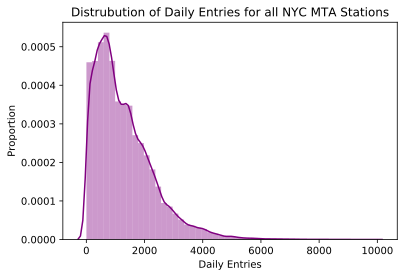

In [43]:
fig = sns.distplot(MTA_by_Station.DAILY_ENTRIES, color='purple');
fig.set(title = "Distrubution of Daily Entries for all NYC MTA Stations", xlabel='Daily Entries', ylabel='Proportion');


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

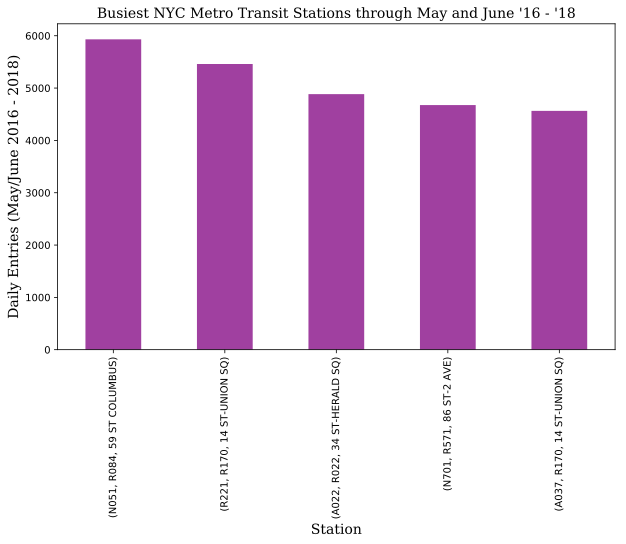

In [44]:
x = MTA_by_Station.groupby(['C/A', 'UNIT', 'STATION'])['DAILY_ENTRIES'].mean().nlargest()
x.plot("bar", figsize=(10, 6), alpha = 0.75, color = "purple");
plt.title("Busiest NYC Metro Transit Stations through May and June '16 - '18", family='serif',fontsize = 14)
plt.xlabel('Station', family='serif',fontsize = 14)
plt.ylabel('Daily Entries (May/June 2016 - 2018)', family='serif',fontsize = 14)
plt.xticks(rotation=90)


In [49]:
warnings.filterwarnings('once')

In [50]:
MTA_Columbus = MTA_by_Station[MTA_by_Station['STATION'] == '59 ST COLUMBUS'].groupby(['C/A', 'UNIT', 'STATION', 'DATE_TIME'], as_index=False).DAILY_ENTRIES.mean()
MTA_Columbus = MTA_Columbus[MTA_Columbus['C/A'] == 'N051'].groupby(['C/A', 'UNIT', 'STATION', 'DATE_TIME'], as_index=False).DAILY_ENTRIES.mean()
MTA_Columbus_2016 = MTA_Columbus[MTA_Columbus['DATE_TIME'] < datetime.datetime(2017, 1, 1).date()].groupby(['STATION', 'DATE_TIME'], as_index=False).DAILY_ENTRIES.mean()
MTA_Columbus_2018 = MTA_Columbus[MTA_Columbus['DATE_TIME'] > datetime.datetime(2018, 1, 1).date()].groupby(['STATION', 'DATE_TIME'], as_index=False).DAILY_ENTRIES.mean()

MTA_UNION_R221 = MTA_by_Station[MTA_by_Station['STATION'] == '14 ST-UNION SQ'].groupby(['C/A', 'UNIT', 'STATION', 'DATE_TIME'], as_index=False).DAILY_ENTRIES.mean()
MTA_UNION_R221 = MTA_UNION_R221[MTA_UNION_R221['C/A'] == 'R221'].groupby(['C/A', 'UNIT', 'STATION', 'DATE_TIME'], as_index=False).DAILY_ENTRIES.mean()
MTA_UNION_R221_2016 = MTA_UNION_R221[MTA_UNION_R221['DATE_TIME'] < datetime.datetime(2017, 1, 1).date()].groupby(['STATION', 'DATE_TIME'], as_index=False).DAILY_ENTRIES.mean()
MTA_UNION_R221_2018 = MTA_UNION_R221[MTA_UNION_R221['DATE_TIME'] > datetime.datetime(2018, 1, 1).date()].groupby(['STATION', 'DATE_TIME'], as_index=False).DAILY_ENTRIES.mean()

MTA_HERALD_SQ = MTA_by_Station[MTA_by_Station['STATION'] == '34 ST-HERALD SQ'].groupby(['C/A', 'UNIT', 'STATION', 'DATE_TIME'], as_index=False).DAILY_ENTRIES.mean()
MTA_HERALD_SQ = MTA_HERALD_SQ[MTA_HERALD_SQ['C/A'] == 'A022'].groupby(['C/A', 'UNIT', 'STATION', 'DATE_TIME'], as_index=False).DAILY_ENTRIES.mean()
MTA_HERALD_SQ_2016 = MTA_HERALD_SQ[MTA_HERALD_SQ['DATE_TIME'] < datetime.datetime(2017, 1, 1).date()].groupby(['STATION', 'DATE_TIME'], as_index=False).DAILY_ENTRIES.mean()
MTA_HERALD_SQ_2018 = MTA_HERALD_SQ[MTA_HERALD_SQ['DATE_TIME'] > datetime.datetime(2018, 1, 1).date()].groupby(['STATION', 'DATE_TIME'], as_index=False).DAILY_ENTRIES.mean()

MTA_2ND_AVE = MTA_by_Station[MTA_by_Station['STATION'] == '86 ST-2 AVE'].groupby(['C/A', 'UNIT', 'STATION', 'DATE_TIME'], as_index=False).DAILY_ENTRIES.mean()
MTA_2ND_AVE = MTA_2ND_AVE[MTA_2ND_AVE['C/A'] == 'N701'].groupby(['C/A', 'UNIT', 'STATION', 'DATE_TIME'], as_index=False).DAILY_ENTRIES.mean()
MTA_2ND_AVE_2016 = MTA_2ND_AVE[MTA_2ND_AVE['DATE_TIME'] < datetime.datetime(2017, 1, 1).date()].groupby(['STATION', 'DATE_TIME'], as_index=False).DAILY_ENTRIES.mean()
MTA_2ND_AVE_2018 = MTA_2ND_AVE[MTA_2ND_AVE['DATE_TIME'] > datetime.datetime(2018, 1, 1).date()].groupby(['STATION', 'DATE_TIME'], as_index=False).DAILY_ENTRIES.mean()

MTA_UNION_R170 = MTA_by_Station[MTA_by_Station['STATION'] == '14 ST-UNION SQ'].groupby(['C/A', 'UNIT', 'STATION', 'DATE_TIME'], as_index=False).DAILY_ENTRIES.mean()
MTA_UNION_R170 = MTA_UNION_R170[MTA_UNION_R170['C/A'] == 'A037'].groupby(['C/A', 'UNIT', 'STATION', 'DATE_TIME'], as_index=False).DAILY_ENTRIES.mean()
MTA_UNION_R170_2016 = MTA_UNION_R170[MTA_UNION_R170['DATE_TIME'] < datetime.datetime(2017, 1, 1).date()].groupby(['STATION', 'DATE_TIME'], as_index=False).DAILY_ENTRIES.mean()
MTA_UNION_R170_2018 = MTA_UNION_R170[MTA_UNION_R170['DATE_TIME'] > datetime.datetime(2018, 1, 1).date()].groupby(['STATION', 'DATE_TIME'], as_index=False).DAILY_ENTRIES.mean()



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until


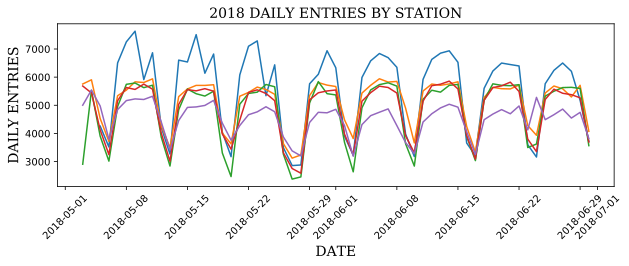

In [51]:
plt.figure(figsize=(10,3))
plt.title('2018 DAILY ENTRIES BY STATION', family='serif',fontsize = 14)
plt.xticks(rotation=45)
plt.xlabel('DATE', family='serif',fontsize = 14)
plt.ylabel('DAILY ENTRIES', family='serif',fontsize = 14)
plt.plot(MTA_Columbus_2018['DATE_TIME'], MTA_Columbus_2018['DAILY_ENTRIES']);
plt.plot(MTA_UNION_R221_2018['DATE_TIME'], MTA_UNION_R221_2018['DAILY_ENTRIES']);
plt.plot(MTA_HERALD_SQ_2018['DATE_TIME'], MTA_HERALD_SQ_2018['DAILY_ENTRIES']);
plt.plot(MTA_2ND_AVE_2018['DATE_TIME'], MTA_2ND_AVE_2018['DAILY_ENTRIES']);
plt.plot(MTA_UNION_R170_2018['DATE_TIME'], MTA_UNION_R170_2018['DAILY_ENTRIES']);


In [52]:
MTA_Top_Five = [MTA_Columbus, MTA_UNION_R221, MTA_HERALD_SQ, MTA_2ND_AVE, MTA_UNION_R170]
MTA_Top_Five = pd.concat(MTA_Top_Five)
MTA_Top_Five['Day_of_Week'] = MTA_Top_Five['DATE_TIME'].dt.day_name()
MTA_Top_Five.head()


,C/A,UNIT,STATION,DATE_TIME,DAILY_ENTRIES,Day_of_Week
0,N051,R084,59 ST COLUMBUS,2016-05-03,7828.0,Tuesday
1,N051,R084,59 ST COLUMBUS,2016-05-04,8145.0,Wednesday
2,N051,R084,59 ST COLUMBUS,2016-05-05,8282.0,Thursday
3,N051,R084,59 ST COLUMBUS,2016-05-06,6765.0,Friday
4,N051,R084,59 ST COLUMBUS,2016-05-07,4354.0,Saturday


In [53]:
MTA_Top_Five_Days = MTA_Top_Five.groupby(['Day_of_Week'], as_index=False).DAILY_ENTRIES.mean()
MTA_Top_Five_Days

,Day_of_Week,DAILY_ENTRIES
0,Friday,5777.225000
1,Monday,5057.549550
2,Saturday,4111.931624
3,Sunday,3420.125000
4,Thursday,5840.624000
5,Tuesday,5675.086207
6,Wednesday,5884.478992


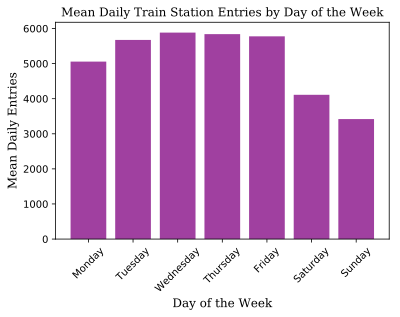

In [54]:
Day_of_Week = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
y_pos = np.arange(len(Day_of_Week))
Daily_Entries = [5057.549550, 5675.086207, 5884.478992, 5840.624000, 5777.225000, 4111.931624, 3420.125000]

plt.bar(y_pos, Daily_Entries, align='center', alpha=0.75, color = "purple")
plt.xticks(y_pos, Day_of_Week)

plt.ylabel('Mean Daily Entries', family='serif',fontsize = 12);
plt.xlabel('Day of the Week', family='serif',fontsize = 12)
plt.title('Mean Daily Train Station Entries by Day of the Week', family='serif',fontsize = 12);
plt.xticks(rotation = 45);